<a href="https://colab.research.google.com/github/muralikrishnan2022/MACHINE-AND-DEEP-LEARNING/blob/main/TRANSFERLEARNING_PYSPARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=b8663f1601ee00382d2fa179e64254e8178140619e82713a1b79a13bc1bd30bf
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

In [ ]:
# Create a SparkSession
spark = SparkSession.builder.appName("FlowerClassification").getOrCreate()

In [ ]:
!pip install split-folders matplotlib opencv-python spicy

In [ ]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/flowers/flowers/flower_photos/train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 3540 images belonging to 5 classes.


In [ ]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/flowers/flowers/flower_photos/validation",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 80 images belonging to 5 classes.


In [ ]:
# test data
test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/flowers/flowers/flower_photos/test",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 50 images belonging to 5 classes.


In [ ]:
# VGG16 model
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Set layers as non-trainable
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# build the entire model
x = vgg16.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = vgg16.input, outputs = predictions)
model.save('/content/drive/MyDrive/flowers/flowers/flower_photos/saved_model')

In [ ]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/flowers/flowers/flower_photos/saved_model')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
111/111 [==============================] - 2654s 24s/step - loss: 3.1742 - accuracy: 0.2503 - val_loss: 1.4855 - val_accuracy: 0.5125
Epoch 2/10
111/111 [==============================] - 2616s 24s/step - loss: 1.5845 - accuracy: 0.3466 - val_loss: 1.2132 - val_accuracy: 0.7000
Epoch 3/10
111/111 [==============================] - 2607s 23s/step - loss: 1.2838 - accuracy: 0.4754 - val_loss: 0.8733 - val_accuracy: 0.7750
Epoch 4/10
111/111 [==============================] - 2602s 23s/step - loss: 1.0684 - accuracy: 0.5732 - val_loss: 0.7646 - val_accuracy: 0.8250
Epoch 5/10
111/111 [==============================] - 2599s 23s/step - loss: 0.8834 - accuracy: 0.6661 - val_loss: 0.6057 - val_accuracy: 0.8125
Epoch 6/10
111/111 [==============================] - 2606s 23s/step - loss: 0.7831 - accuracy: 0.7186 - val_loss: 0.5124 - val_accuracy: 0.8250
Epoch 7/10
111/111 [==============================] - 2654s 24s/step - loss: 0.7209 - accuracy: 0.7438 - val_loss: 0.4741 - val_ac

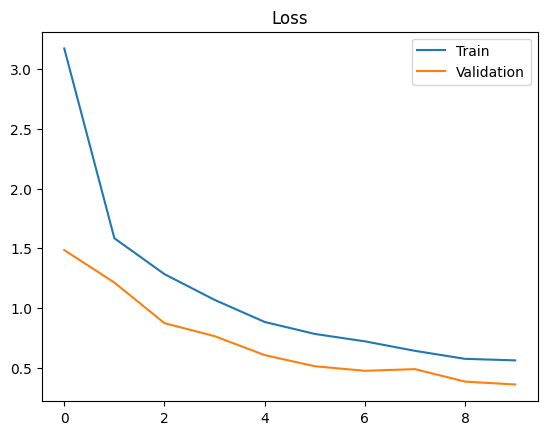

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

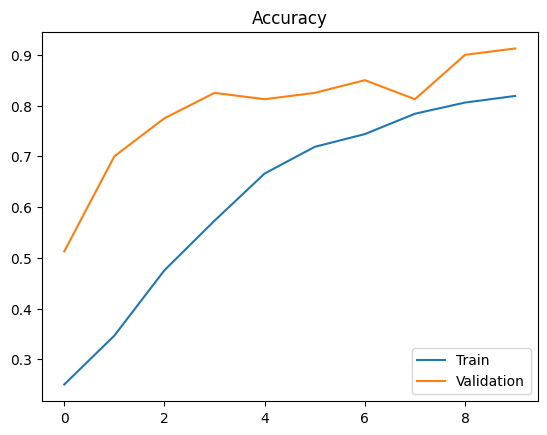

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 [==============================] - 39s 15s/step - loss: 0.6795 - accuracy: 0.8400
The test loss is:  0.6794552803039551
The best accuracy is:  83.99999737739563


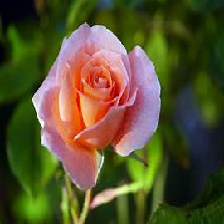

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/flowers/flowers/new image to test.jfif', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
img

In [ ]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 864ms/step
[[1.6786526e-10 3.0158254e-10 9.9834645e-01 6.7474349e-07 1.6528397e-03]]


In [ ]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[2]


In [ ]:
# transform classes number into classes name
class_names[class_id.item()]

'roses'

In [ ]:
model.save('/content/drive/MyDrive/flowers/flowers/flower_photos/saved_model')

In [ ]:
spark.stop()